In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### <font color='blue'>Merge e limpeza dos dados</font>

In [2]:
pd.set_option('display.max_columns', None)
df_hrv = pd.read_csv("Overview - HRV 2.csv")
df_hrv.head(2)

,ID,pnni50_1,pnni50_2,pnni50_3,pnni50_4,pnni50_5,pnni50_6,pnni50_7,rmssd_1,rmssd_2,rmssd_3,rmssd_4,rmssd_5,rmssd_6,rmssd_7,sdnn_1,sdnn_2,sdnn_3,sdnn_4,sdnn_5,sdnn_6,sdnn_7,sdnni_1,sdnni_2,sdnni_3,sdnni_4,sdnni_5,sdnni_6,sdnni_7
0,619d06aa1913dc00199e6892,0.93,0.64,0.52,0.63,0.35,0.56,1.33,14.54,12.80,12.10,13.79,12.85,12.99,17.75,125.49,137.21,125.63,104.27,90.21,97.03,117.40,48.93,42.25,36.65,45.48,40.6,44.39,44.75
1,619d07ce1913dc00199e68d0,1.90,0.84,1.15,1.95,0.48,0.51,2.60,19.11,18.28,16.77,18.45,12.62,12.93,22.94,165.31,40.55,167.71,186.18,59.19,92.47,180.58,79.17,38.53,56.78,52.93,42.1,48.60,76.35


In [3]:
df = pd.read_csv("Overview 2.csv").rename(columns={'hr_mean_x':'hr_mean'}).drop(columns=['hr_mean_y'])
df.head(2)

,ID,IDADE,SEXO,ESCOLARIDADE,IPAQ,PCL,IMC,CIRCUNFERENCIA _ABDOMINAL,CD_HIPERTENSÃO,SPPB,NUMERO_MEDICAMENTOS,CD_REUMATISMO,CD_ESCOLIOSE,CD_DEPRESSÃO,CD_ANSIEDADE,CD_DIABETES MELLITUS,CD_CARDIOPATIA,CD_OSTEOPOROSE,CD_DOENÇA PULMONAR,CD_ACIDENTE VASCULAR ENCEFÁLICO,CD_GLAUCOMA,CD_CATARATA,CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),CD_DEMÊNCIA,CD_LABIRINTITE,CD_SINUSITE,CD_EPILEPSIA,CD_CEFALÉIA CRÔNICA,CD_CÂNCER DE MAMA,CD_CÂNCER DE PRÓSTATA,active_mins_d1,active_mins_d2,active_mins_d3,active_mins_d4,active_mins_d5,active_mins_d6,active_mins_d7,active_mins_d8,active_mins_mean,hr_d1,hr_d2,hr_d3,hr_d4,hr_d5,hr_d6,hr_d7,hr_d8,hr_mean,steps_d1,steps_d2,steps_d3,steps_d4,steps_d5,steps_d6,steps_d7,steps_d8,steps_mean,hr_max,hr_min
0,618aaae0d068f5001c785795,82,1,11.0,2.0,29.0,32.03125,114.0,1.0,9.0,7,1,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,619d092e1913dc00199e68fc,68,1,13.0,4.0,30.0,31.18458712,105.0,2.0,9.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,13.0,28.0,22.0,0.0,0.0,24.0,0.0,24.0,"13,88","77,05","74,95","74,55","69,39","71,54","74,32","75,27","76,44","74,19",8850.0,12185.0,10639.0,6524.0,7384.0,10562.0,6927.0,10379.0,"9181,25",136.0,48.0


In [4]:
df_merge = df.merge(df_hrv, how='left', on='ID')

In [5]:
df_merge['IMC'] = np.where(df_merge['IMC'] == '#DIV/0!', 0, df_merge['IMC'])
df_merge['IPAQ'] = np.where(df_merge['IPAQ'] == '-', 0, df_merge['IPAQ'])
df_merge['IMC'] = df_merge['IMC'].astype(float).round(2)
df_merge = df_merge.replace(',','.', regex=True)
cols = df_merge.columns.drop('ID')
df_merge[cols] = df_merge[cols].apply(pd.to_numeric)
df_merge.dropna(subset=['pnni50_6', 'rmssd_6', 'sdnn_6', 'sdnni_6'], how = 'any', inplace = True)
df_merge.head(2)

,ID,IDADE,SEXO,ESCOLARIDADE,IPAQ,PCL,IMC,CIRCUNFERENCIA _ABDOMINAL,CD_HIPERTENSÃO,SPPB,NUMERO_MEDICAMENTOS,CD_REUMATISMO,CD_ESCOLIOSE,CD_DEPRESSÃO,CD_ANSIEDADE,CD_DIABETES MELLITUS,CD_CARDIOPATIA,CD_OSTEOPOROSE,CD_DOENÇA PULMONAR,CD_ACIDENTE VASCULAR ENCEFÁLICO,CD_GLAUCOMA,CD_CATARATA,CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),CD_DEMÊNCIA,CD_LABIRINTITE,CD_SINUSITE,CD_EPILEPSIA,CD_CEFALÉIA CRÔNICA,CD_CÂNCER DE MAMA,CD_CÂNCER DE PRÓSTATA,active_mins_d1,active_mins_d2,active_mins_d3,active_mins_d4,active_mins_d5,active_mins_d6,active_mins_d7,active_mins_d8,active_mins_mean,hr_d1,hr_d2,hr_d3,hr_d4,hr_d5,hr_d6,hr_d7,hr_d8,hr_mean,steps_d1,steps_d2,steps_d3,steps_d4,steps_d5,steps_d6,steps_d7,steps_d8,steps_mean,hr_max,hr_min,pnni50_1,pnni50_2,pnni50_3,pnni50_4,pnni50_5,pnni50_6,pnni50_7,rmssd_1,rmssd_2,rmssd_3,rmssd_4,rmssd_5,rmssd_6,rmssd_7,sdnn_1,sdnn_2,sdnn_3,sdnn_4,sdnn_5,sdnn_6,sdnn_7,sdnni_1,sdnni_2,sdnni_3,sdnni_4,sdnni_5,sdnni_6,sdnni_7
1,619d092e1913dc00199e68fc,68,1,13.0,4.0,30.0,31.18,105.0,2.0,9.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,13.0,28.0,22.0,0.0,0.0,24.0,0.0,24.0,13.88,77.05,74.95,74.55,69.39,71.54,74.32,75.27,76.44,74.19,8850.0,12185.0,10639.0,6524.0,7384.0,10562.0,6927.0,10379.0,9181.25,136.0,48.0,1.86,1.84,2.00,1.22,2.15,0.94,1.36,18.20,18.78,19.21,17.24,18.69,16.68,16.89,158.42,154.15,134.69,140.25,163.04,137.53,122.12,51.02,56.36,60.11,51.76,55.72,45.57,49.60
2,619d07ce1913dc00199e68d0,75,1,8.0,2.0,30.0,28.89,90.0,2.0,8.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,81.0,69.0,82.0,229.0,0.0,126.0,53.0,0.0,80.00,81.55,75.07,79.03,83.68,72.00,90.87,70.96,70.20,77.92,14253.0,16218.0,11791.0,19861.0,22.0,11052.0,5542.0,0.0,9842.38,158.0,45.0,1.90,0.84,1.15,1.95,0.48,0.51,2.60,19.11,18.28,16.77,18.45,12.62,12.93,22.94,165.31,40.55,167.71,186.18,59.19,92.47,180.58,79.17,38.53,56.78,52.93,42.10,48.60,76.35


In [6]:
# Calculando a média dos índices do HRV
df_merge['sdnn_mean'] = df_merge[['sdnn_1','sdnn_2', 'sdnn_3', 'sdnn_4', 'sdnn_5', 'sdnn_6', 'sdnn_7']].mean(axis=1)
df_merge['sdnni_mean'] = df_merge[['sdnni_1','sdnni_2', 'sdnni_3', 'sdnni_4', 'sdnni_5', 'sdnni_6', 'sdnni_7']].mean(axis=1)
df_merge['rmssd_mean'] = df_merge[['rmssd_1', 'rmssd_2','rmssd_3', 'rmssd_4', 'rmssd_5', 'rmssd_6', 'rmssd_7']].mean(axis=1)
df_merge['pnni50_mean'] = df_merge[['pnni50_1', 'pnni50_2', 'pnni50_3', 'pnni50_4', 'pnni50_5', 'pnni50_6', 'pnni50_7']].mean(axis=1)

In [7]:
# 2 idosos com 59 anos foram colocados no grupo entre 60-70
df_merge['IDADE'] = np.where(df_merge['IDADE'] < 60, 60, df_merge['IDADE'])

Total de idosos após a limpeza. Foram removidos idosos que não tinha informações essencias como ID, idade e sexo; ao menos um dia de informação do HRV ou não tinham dados no Grafana.

In [8]:
df_merge.ID.nunique()

219

#### <font color='blue'>Análise dos dados</font>

Valor absoluto e percentual de colunas vazias

In [9]:
# Procurando por valores vazios
pd.set_option('display.max_rows', None)
null_val = df_merge.isnull().sum().to_frame().rename(columns={0:"absoluto"})
null_val["percentual"] = (null_val.apply(lambda x: x/x.sum())*100).round(2)
null_val

,absoluto,percentual
ID,0,0.00
IDADE,0,0.00
SEXO,0,0.00
ESCOLARIDADE,5,1.34
IPAQ,2,0.54
PCL,2,0.54
IMC,0,0.00
CIRCUNFERENCIA _ABDOMINAL,2,0.54
CD_HIPERTENSÃO,0,0.00
SPPB,3,0.81


#### <font color='blue'>Distribuição por sexo:</font>

1 - Feminino, 2 - Masculino

In [10]:
df_sexo = df_merge[['SEXO']].value_counts().to_frame().rename(columns={0:"absoluto"})
df_sexo["percentual"] = (df_sexo.apply(lambda x: x/x.sum())*100).round(2)
df_sexo

,absoluto,percentual
SEXO,,
1,134,60.91
2,86,39.09


#### <font color='blue'>Média e desvio padrão</font>

In [11]:
df_merge[['IDADE','IMC','CIRCUNFERENCIA _ABDOMINAL','NUMERO_MEDICAMENTOS']].describe()[1:3]

,IDADE,IMC,CIRCUNFERENCIA _ABDOMINAL,NUMERO_MEDICAMENTOS
mean,71.618182,27.461136,98.103670,2.495455
std,6.680554,5.034902,11.588362,1.625981


#### <font color='blue'>Incidência de doenças em valor absoluto e percentual</font>

In [12]:
doencas = ['CD_HIPERTENSÃO','CD_REUMATISMO', 'CD_ESCOLIOSE', 'CD_DEPRESSÃO','CD_ANSIEDADE', 'CD_DIABETES MELLITUS', 
           'CD_CARDIOPATIA','CD_OSTEOPOROSE', 'CD_DOENÇA PULMONAR','CD_ACIDENTE VASCULAR ENCEFÁLICO', 'CD_GLAUCOMA', 
           'CD_CATARATA','CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII)', 'CD_DEMÊNCIA','CD_LABIRINTITE', 'CD_SINUSITE', 
           'CD_EPILEPSIA', 'CD_CEFALÉIA CRÔNICA','CD_CÂNCER DE MAMA', 'CD_CÂNCER DE PRÓSTATA']
prev_doencas = df[doencas][df == 1].count().to_frame().rename(columns={0:"absoluto"})
prev_doencas["percentual"] = (prev_doencas.apply(lambda x: x/x.sum())*100).round(2)
prev_doencas.sort_values(by=['absoluto'], ascending=False)

,absoluto,percentual
CD_HIPERTENSÃO,140,48.11
CD_REUMATISMO,38,13.06
CD_OSTEOPOROSE,19,6.53
CD_DIABETES MELLITUS,19,6.53
CD_CARDIOPATIA,17,5.84
CD_DEPRESSÃO,15,5.15
CD_ANSIEDADE,11,3.78
CD_GLAUCOMA,6,2.06
CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),5,1.72
CD_CATARATA,3,1.03


#### <font color='blue'>Min, max, mean e std do HR</font>

In [13]:
hr = df_merge[['ID','hr_d1', 'hr_d2', 'hr_d3', 'hr_d4', 'hr_d5', 'hr_d6', 'hr_d7', 'hr_d8', 'hr_mean', 'hr_max', 'hr_min']]
hr['hr_std'] = hr.std(axis=1)
hr.head(2)

,ID,hr_d1,hr_d2,hr_d3,hr_d4,hr_d5,hr_d6,hr_d7,hr_d8,hr_mean,hr_max,hr_min,hr_std
1,619d092e1913dc00199e68fc,77.05,74.95,74.55,69.39,71.54,74.32,75.27,76.44,74.19,136.0,48.0,21.062545
2,619d07ce1913dc00199e68d0,81.55,75.07,79.03,83.68,72.00,90.87,70.96,70.20,77.92,158.0,45.0,27.678228


#### <font color='blue'>Min, max, mean e std dos passos</font>

In [14]:
steps = df_merge[['ID','steps_d1','steps_d2','steps_d3','steps_d4','steps_d5','steps_d6','steps_d7','steps_d8','steps_mean']]
steps['steps_min'] = steps.min(axis=1)
steps['steps_max'] = steps.max(axis=1)
steps['steps_std'] = steps.std(axis=1)
steps.head(2)

,ID,steps_d1,steps_d2,steps_d3,steps_d4,steps_d5,steps_d6,steps_d7,steps_d8,steps_mean,steps_min,steps_max,steps_std
1,619d092e1913dc00199e68fc,8850.0,12185.0,10639.0,6524.0,7384.0,10562.0,6927.0,10379.0,9181.25,6524.0,12185.0,2145.778562
2,619d07ce1913dc00199e68d0,14253.0,16218.0,11791.0,19861.0,22.0,11052.0,5542.0,0.0,9842.38,0.0,19861.0,7581.445049


#### <font color='blue'>Número de idosos por faixa etária</font>

In [15]:
df_merge['CATEGORIA'] = np.where(df_merge['IDADE'] < 70, '60-70', '70-80')
df_merge['CATEGORIA'] = np.where((df_merge['IDADE'] >= 80) & (df_merge['IDADE'] < 90), '80-90', df_merge['CATEGORIA'])
df_merge['CATEGORIA'] = np.where(df_merge['IDADE'] >= 90, '90-100', df_merge['CATEGORIA'])
df_merge.CATEGORIA.value_counts()

60-70     96
70-80     94
80-90     28
90-100     2
Name: CATEGORIA, dtype: int64

#### <font color='blue'>Plot da média de passos por faixa etária e por sexo</font>

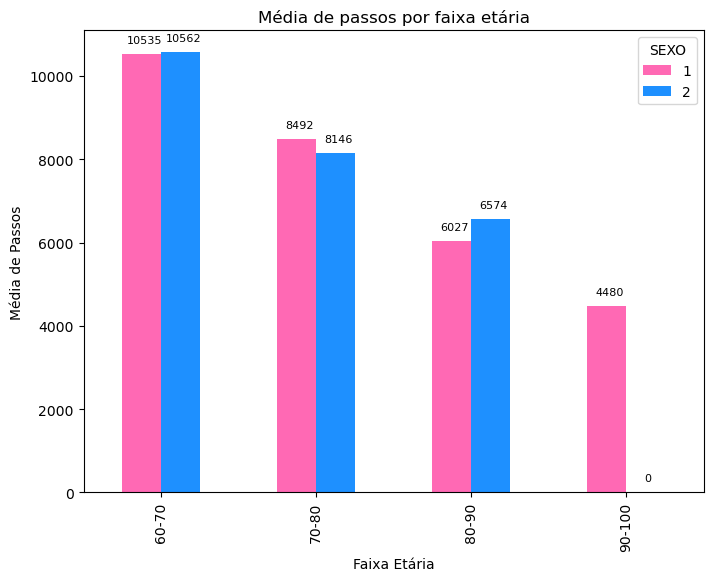

In [16]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['hotpink','dodgerblue'])

# Agrupar a média de passos por faixa etária e sexo
counts = df_merge.groupby(['CATEGORIA', 'SEXO']).steps_mean.mean().unstack()

ax = counts.plot(kind='bar',stacked = False, colormap = cmap, figsize=(8, 6))
for p in ax.patches:
        #Acrescentando anotação acima de cada barra com o número de passos
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=8)

plt.xlabel ('Faixa Etária')
plt.ylabel ('Média de Passos')
plt.title('Média de passos por faixa etária',fontsize=12)
plt.show()

#### <font color='blue'>Idosos com o PCL menor que 22</font>

In [17]:
print('N de idosos com o PCL menor que 22: ', df_merge[df_merge['PCL'] < 22].ID.nunique())
df_merge[df_merge['PCL'] < 22]

N de idosos com o PCL menor que 22:  19


,ID,IDADE,SEXO,ESCOLARIDADE,IPAQ,PCL,IMC,CIRCUNFERENCIA _ABDOMINAL,CD_HIPERTENSÃO,SPPB,NUMERO_MEDICAMENTOS,CD_REUMATISMO,CD_ESCOLIOSE,CD_DEPRESSÃO,CD_ANSIEDADE,CD_DIABETES MELLITUS,CD_CARDIOPATIA,CD_OSTEOPOROSE,CD_DOENÇA PULMONAR,CD_ACIDENTE VASCULAR ENCEFÁLICO,CD_GLAUCOMA,CD_CATARATA,CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),CD_DEMÊNCIA,CD_LABIRINTITE,CD_SINUSITE,CD_EPILEPSIA,CD_CEFALÉIA CRÔNICA,CD_CÂNCER DE MAMA,CD_CÂNCER DE PRÓSTATA,active_mins_d1,active_mins_d2,active_mins_d3,active_mins_d4,active_mins_d5,active_mins_d6,active_mins_d7,active_mins_d8,active_mins_mean,hr_d1,hr_d2,hr_d3,hr_d4,hr_d5,hr_d6,hr_d7,hr_d8,hr_mean,steps_d1,steps_d2,steps_d3,steps_d4,steps_d5,steps_d6,steps_d7,steps_d8,steps_mean,hr_max,hr_min,pnni50_1,pnni50_2,pnni50_3,pnni50_4,pnni50_5,pnni50_6,pnni50_7,rmssd_1,rmssd_2,rmssd_3,rmssd_4,rmssd_5,rmssd_6,rmssd_7,sdnn_1,sdnn_2,sdnn_3,sdnn_4,sdnn_5,sdnn_6,sdnn_7,sdnni_1,sdnni_2,sdnni_3,sdnni_4,sdnni_5,sdnni_6,sdnni_7,sdnn_mean,sdnni_mean,rmssd_mean,pnni50_mean,CATEGORIA
69,62883ed6d309101d88c67eb7,80,2,2.0,2.0,17.0,27.7,96.0,0.0,13.0,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,249.0,160.0,98.0,209.0,305.0,70.0,56.0,143.38,98.64,83.65,78.46,78.94,86.63,81.72,71.96,71.64,81.46,0.0,27608.0,25197.0,21701.0,28150.0,30217.0,22787.0,7933.0,20449.12,140.0,49.0,4.21,7.07,1.62,8.41,4.56,5.00,2.22,22.25,28.82,16.37,28.03,23.49,35.83,18.83,133.51,173.93,107.68,180.67,135.84,158.26,134.05,69.53,85.55,51.72,57.01,71.18,87.32,58.19,146.277143,68.642857,24.802857,4.727143,80-90
88,629e6e33b847f8df6354b756,74,1,3.0,3.0,18.0,27.7,107.0,1.0,12.0,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,218.0,295.0,159.0,482.0,187.0,325.0,58.0,215.50,75.30,91.04,92.66,89.11,94.99,90.10,94.04,92.60,89.98,104.0,17627.0,18041.0,15676.0,26145.0,12430.0,21217.0,6092.0,14666.50,137.0,59.0,0.34,0.32,0.36,0.36,0.24,1.32,0.34,10.99,11.85,12.08,10.73,10.49,20.14,11.09,83.89,73.04,89.00,70.91,75.67,70.32,70.86,30.65,33.10,37.64,31.28,35.47,38.48,28.94,76.241429,33.651429,12.481429,0.468571,70-80
98,62a1fd04b847f8df6354f61a,74,2,99.0,3.0,18.0,22.7,87.5,1.0,6.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,82.0,66.0,23.0,37.0,21.0,56.0,12.0,37.12,58.93,70.61,68.07,65.59,73.79,65.36,72.26,65.62,67.53,145.0,18969.0,13556.0,11757.0,9022.0,10519.0,16664.0,2767.0,10424.88,169.0,43.0,2.96,1.58,1.66,3.09,4.25,4.18,2.20,28.62,18.82,18.59,24.36,29.82,28.88,19.72,192.84,170.33,164.91,170.12,198.17,148.02,173.99,111.54,96.96,76.36,113.67,136.80,91.34,105.44,174.054286,104.587143,24.115714,2.845714,70-80
104,62b123147b13adabc52c21ed,77,2,0.0,1.0,13.0,28.2,105.8,1.0,6.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.38,62.86,72.40,73.92,72.03,73.76,69.86,73.69,69.84,71.05,45.0,5769.0,5997.0,4578.0,7798.0,5386.0,4994.0,3680.0,4780.88,149.0,53.0,1.16,0.99,0.97,1.08,1.01,3.24,1.01,16.77,15.34,15.99,16.73,16.58,23.12,15.95,96.54,95.51,116.96,93.13,121.90,90.70,103.18,46.42,44.33,47.30,48.02,49.91,58.24,46.18,102.560000,48.628571,17.211429,1.351429,70-80
107,62b121db7b13adabc52c214e,75,1,0.0,2.0,20.0,32.8,104.6,1.0,9.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0.0,27.0,0.0,30.0,23.0,0.0,22.0,0.0,12.75,66.11,64.98,66.11,68.05,73.45,68.14,68.97,66.45,67.78,458.0,13631.0,10338.0,17084.0,17390.0,14640.0,18210.0,3981.0,11966.50,130.0,47.0,2.80,2.49,0.94,1.74,2.42,5.11,1.58,25.42,23.25,17.49,19.73,22.40,32.46,20.58,125.16,150.94,125.07,146.37,132.67,118.74,119.22,80.20,78.64,57.17,67.22,71.74,87.15,63.87,131.167143,72.284286,23.047143,2.440000,70-80
119,62d35f6014a6f0426dc6b1db,69,1,1.0,3.0,16.0,21.0,91.0,1.0,9.0,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.88,83.00,85.72,85.03,85.36,86.63,76.17,90.35,NaN,84.61,3245.0,7089.0,5946.0,5971.0,7052.0,82.0,0.0,5344.0,4341.12,155.0,56.0,2.20,NaN,2.10,3.75,1.70,1.94,1.68,19.36,NaN,17.97,23.41,17.83,19.16,17.61,92.17,NaN,94.41,57.05,76.34,87.18,72.76,44.48,NaN,42.68,59.58,39.17,41.00,49.88,79.985000,46.131667,19.223333,2.228333,60-70
128,62df4c5914a6f0426dc72aff,73,2,0.0,3.0,20.0,3

#### <font color='blue'>IPAQ por sexo</font>

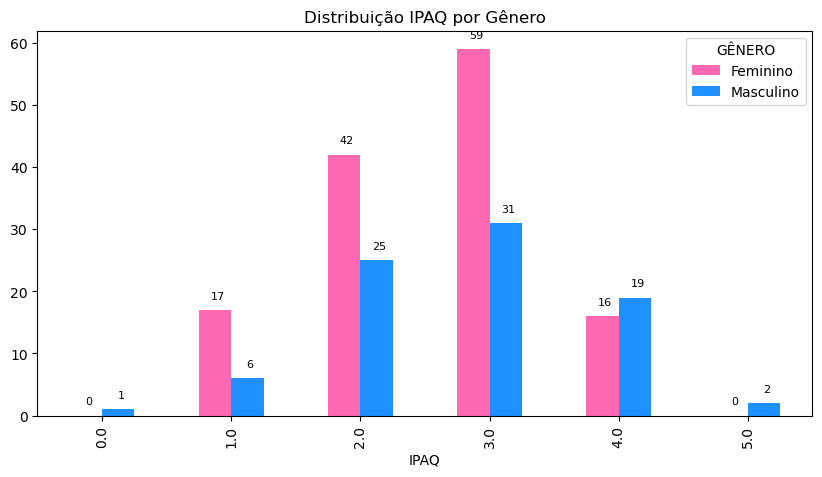

In [18]:
df_merge['GÊNERO'] = df_merge['SEXO'].replace({1:'Feminino',2:'Masculino'})
ax = df_merge.groupby('IPAQ')['GÊNERO'].value_counts().unstack('GÊNERO').plot.bar(figsize=(10,5), color = ['hotpink','dodgerblue'], title='Distribuição IPAQ por Gênero')
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=8)

#### <font color='blue'>IPAQ total</font>

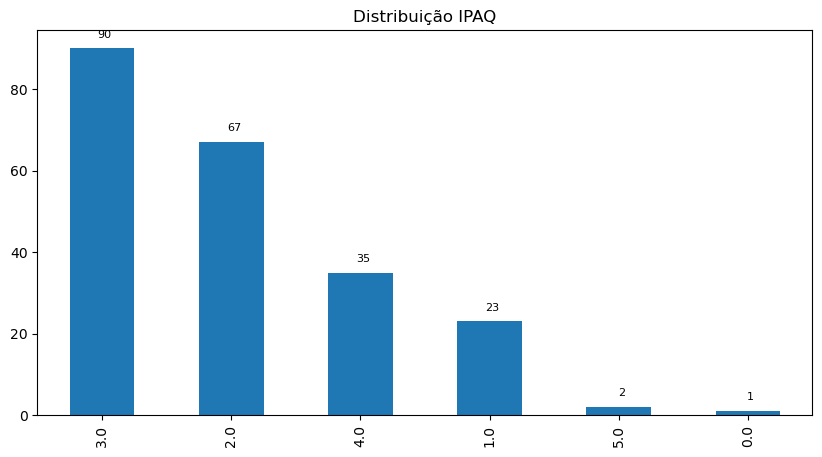

In [19]:
ax = df_merge['IPAQ'].value_counts().plot.bar(figsize=(10,5), title='Distribuição IPAQ')
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=8)

In [20]:
# Classificando o SPPB
df_merge['SPPB_CLASSIFICACAO'] = np.where(df_merge['SPPB'] <= 3, 'incapacidade ou capacidade ruim', 'capacidade moderada')
df_merge['SPPB_CLASSIFICACAO'] = np.where((df_merge['SPPB'] >= 4) & (df_merge['SPPB'] <= 6), 'baixa capacidade', df_merge['SPPB_CLASSIFICACAO'])
df_merge['SPPB_CLASSIFICACAO'] = np.where(df_merge['SPPB'] >= 10, 'boa capacidade', df_merge['SPPB_CLASSIFICACAO'])                                        

#### <font color='blue'>SPPB por sexo</font>

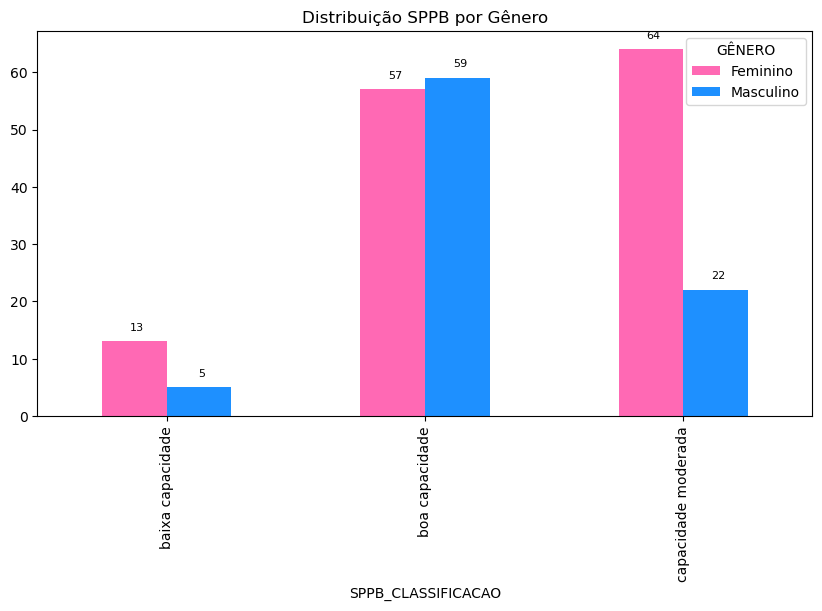

In [21]:
ax = df_merge.groupby('SPPB_CLASSIFICACAO')['GÊNERO'].value_counts().unstack('GÊNERO').plot.bar(figsize=(10,5), color = ['hotpink','dodgerblue'], title='Distribuição SPPB por Gênero')
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=8)

#### <font color='blue'>SPPB total</font>

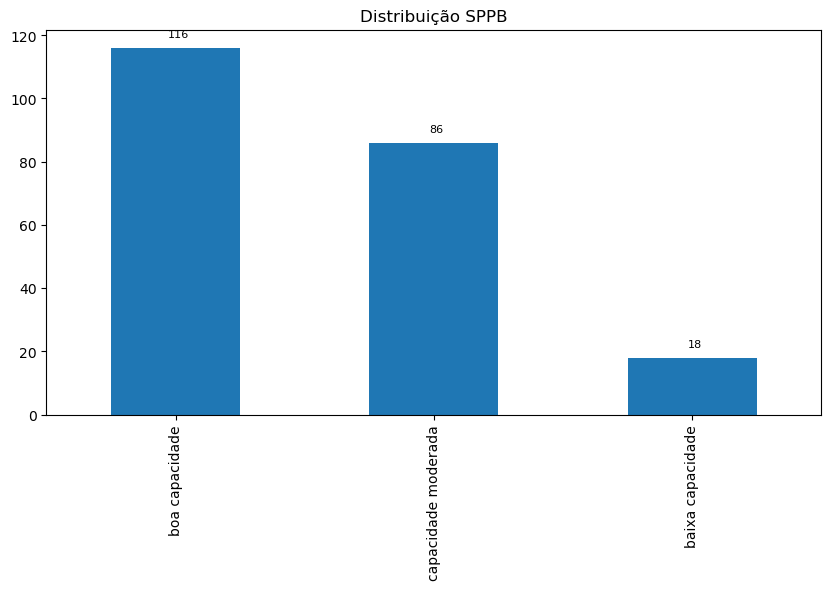

In [22]:
ax = df_merge['SPPB_CLASSIFICACAO'].value_counts().plot.bar(figsize=(10,5), title='Distribuição SPPB')
for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points', fontsize=8)

#### <font color='blue'>Média e std dos índices do HRV por sexo - Dia específico</font>

In [23]:
df_merge.groupby('GÊNERO')['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].mean()

,sdnn_6,sdnni_6,rmssd_6,pnni50_6
GÊNERO,,,,
Feminino,111.931866,56.205896,19.937164,2.449328
Masculino,126.683140,65.898837,24.691977,4.868023


In [24]:
df_merge.groupby('GÊNERO')['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].std()

,sdnn_6,sdnni_6,rmssd_6,pnni50_6
GÊNERO,,,,
Feminino,38.673212,16.275789,6.843165,2.884889
Masculino,51.031965,18.795176,8.509831,7.594012


#### <font color='blue'>Média e std dos índices do HRV por faixa etária - Dia específico</font>

In [25]:
df_merge.groupby('CATEGORIA')['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].mean()

,sdnn_6,sdnni_6,rmssd_6,pnni50_6
CATEGORIA,,,,
60-70,112.284583,55.654167,20.561146,2.734688
70-80,124.710851,64.375957,23.064681,4.215957
80-90,113.997143,60.060714,22.025714,3.021786
90-100,99.780000,61.525000,18.210000,1.710000


In [26]:
df_merge.groupby('CATEGORIA')['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].std()

,sdnn_6,sdnni_6,rmssd_6,pnni50_6
CATEGORIA,,,,
60-70,37.990751,15.692970,6.910200,3.072612
70-80,49.587536,19.767719,8.820648,7.420335
80-90,46.068220,15.817821,7.328625,2.592088
90-100,11.002582,8.393357,4.567910,1.187939


#### <font color='blue'>Média e std dos índices do HRV por faixa etária e sexo - Dia específico</font>

In [27]:
df_merge.groupby(['CATEGORIA','GÊNERO'])['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].mean()

sdnn_6    sdnni_6    rmssd_6  pnni50_6
CATEGORIA GÊNERO                                               
60-70     Feminino   105.433770  50.763443  18.794918  2.080000
          Masculino  124.224571  64.178000  23.639429  3.875714
70-80     Feminino   121.102069  62.140517  21.297759  2.929138
          Masculino  130.525000  67.977500  25.911389  6.289167
80-90     Feminino   103.379231  54.447692  19.492308  2.155385
          Masculino  123.199333  64.925333  24.221333  3.772667
90-100    Feminino    99.780000  61.525000  18.210000  1.710000

In [28]:
df_merge.groupby(['CATEGORIA','GÊNERO'])['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].std()

sdnn_6    sdnni_6   rmssd_6   pnni50_6
CATEGORIA GÊNERO                                              
60-70     Feminino   29.583797  10.474134  5.847307   2.784648
          Masculino  47.511145  19.411272  7.598229   3.253596
70-80     Feminino   48.101127  20.483255  7.735514   3.090690
          Masculino  52.050979  18.259245  9.786533  11.116841
80-90     Feminino   21.799589   7.732446  6.767852   2.447150
          Masculino  59.078092  19.408133  7.293556   2.554163
90-100    Feminino   11.002582   8.393357  4.567910   1.187939

#### <font color='blue'>Percentis</font>

In [29]:
# Dia específico por faixa etária
df_merge.groupby('CATEGORIA')['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].quantile([0.05,0.25,0.50,0.75,0.95])

sdnn_6  sdnni_6  rmssd_6  pnni50_6
CATEGORIA                                           
60-70     0.05   66.3225  37.1550  13.4100    0.5375
          0.25   81.6900  44.7600  16.3325    1.0200
          0.50  108.4950  51.4500  18.4550    1.5950
          0.75  134.9725  62.9425  22.6150    3.2450
          0.95  181.3925  85.7775  34.3950    8.1550
70-80     0.05   63.2940  38.7920  12.5430    0.4465
          0.25   94.8750  50.4275  17.6125    1.2900
          0.50  119.0550  63.1500  21.3750    2.4050
          0.75  137.4250  74.2375  27.1400    4.4475
          0.95  229.6640  99.8240  38.8405   10.6115
80-90     0.05   72.4645  38.1210  14.0470    0.6020
          0.25   86.1850  50.5575  16.5025    1.0150
          0.50  100.3600  59.5750  20.5200    2.2100
          0.75  125.0100  63.1625  24.9025    3.9625
          0.95  175.0450  90.2870  35.5185    8.7855
90-100    0.05   92.7780  56.1835  15.3030    0.9540
          0.25   95.8900  58.5575  16.5950    1.2900
          0.50   99.7800  61.5250  18.2100    1.7100
          0.75  103.6700  64.4925  19.8250    2.1300
          0.95  106.7820  66.8665  21.1170    2.4660

In [30]:
# Dia específico por faixa etária e sexo
df_merge.groupby(['CATEGORIA','GÊNERO'])['sdnn_6','sdnni_6','rmssd_6','pnni50_6'].quantile([0.05,0.25,0.50,0.75,0.95])

sdnn_6   sdnni_6  rmssd_6  pnni50_6
CATEGORIA GÊNERO                                               
60-70     Feminino  0.05   69.4300   34.5300  12.9000    0.4700
                    0.25   82.0000   44.4000  15.9200    0.9300
                    0.50  102.1800   49.4100  17.3900    1.3300
                    0.75  123.3000   55.6200  19.1600    1.8200
                    0.95  145.0600   67.4500  33.9800    6.3100
          Masculino 0.05   60.3600   41.0760  15.0170    0.7690
                    0.25   81.8400   48.3400  19.4150    2.0350
                    0.50  125.6600   61.0400  22.1600    3.0000
                    0.75  148.6600   74.1500  27.6900    5.2600
                    0.95  193.6470   96.8970  35.3500    8.1900
70-80     Feminino  0.05   63.6860   38.2115  11.7720    0.4340
                    0.25   92.5600   49.0350  17.2200    1.1975
                    0.50  110.7350   58.7700  19.9700    1.8500
                    0.75  136.0700   70.4450  24.2850    3.2550
                    0.95  228.3360   88.9440  35.1450    9.3135
          Masculino 0.05   71.8950   45.4725  14.0575    0.7575
                    0.25  102.8500   56.3500  20.5650    2.3100
                    0.50  123.2300   64.7600  23.8800    3.5850
                    0.75  143.3400   75.8250  29.1225    5.1150
                    0.95  224.2825  101.3525  43.5850   16.6100
80-90     Feminino  0.05   78.0180   41.9960  13.6720    0.6800
                    0.25   86.8400   50.7700  15.3700    0.9100
                    0.50   96.7800   55.7400  18.4700    1.4400
                    0.75  114.4300   61.9600  20.7600    2.1300
                    0.95  138.9120   62.9080  28.7860    5.6780
          Masculino 0.05   66.9530   36.8230  14.1240    0.6260
                    0.25   90.5750   54.4600  18.8350    1.7600
                    0.50  100.4000   62.5800  24.2000    3.7200
                    0.75  145.8200   83.3350  28.2350    5.1150
                    0.95  210.3680   91.7820  35.2070    7.7810
90-100    Feminino  0.05   92.7780   56.1835  15.3030    0.9540
                    0.25   95.8900   58.5575  16.5950    1.2900
                    0.50   99.7800   61.5250  18.2100    1.7100
                    0.75  103.6700   64.4925  19.8250    2.1300
                    0.95  106.7820   66.8665  21.1170    2.4660

In [31]:
# Média de todos os dias por faixa etária
df_merge.groupby('CATEGORIA')['sdnn_mean','sdnni_mean','rmssd_mean','pnni50_mean'].quantile([0.05,0.25,0.50,0.75,0.95])

sdnn_mean  sdnni_mean  rmssd_mean  pnni50_mean
CATEGORIA                                                      
60-70     0.05   70.226071   35.064286   12.824643     0.482143
          0.25   87.849821   43.593214   14.670000     0.810357
          0.50  116.942857   50.237143   17.336429     1.420714
          0.75  139.993929   61.380000   19.383214     2.299286
          0.95  192.899286   84.056786   27.835357     5.233571
70-80     0.05   75.173929   38.592929   12.781643     0.468071
          0.25  105.385714   48.662857   16.457143     1.339643
          0.50  125.859286   63.118571   20.054286     2.155714
          0.75  152.781786   72.063214   23.667619     3.692500
          0.95  209.039857  107.388429   29.638357     6.002857
80-90     0.05   71.881214   39.448357   12.864929     0.485643
          0.25   88.956786   48.213214   14.878929     0.810357
          0.50  105.542857   52.416429   18.815714     2.087143
          0.75  132.977143   64.488393   23.404286     3.726786
          0.95  196.899929   83.612857   25.923643     4.572643
90-100    0.05   77.533000   47.966286   14.899286     0.943429
          0.25   80.767857   48.722857   14.936429     0.945714
          0.50   84.811429   49.668571   14.982857     0.948571
          0.75   88.855000   50.614286   15.029286     0.951429
          0.95   92.089857   51.370857   15.066429     0.953714

In [32]:
# Média de todos os dias por faixa etária e sexo
df_merge.groupby(['CATEGORIA','GÊNERO'])['sdnn_mean','sdnni_mean','rmssd_mean','pnni50_mean'].quantile([0.05,0.25,0.50,0.75,0.95])

sdnn_mean  sdnni_mean  rmssd_mean  pnni50_mean
CATEGORIA GÊNERO                                                         
60-70     Feminino  0.05   70.491429   34.661429   12.888571     0.475714
                    0.25   82.130000   41.580000   14.278571     0.624286
                    0.50  113.891429   49.834286   16.505714     1.151429
                    0.75  134.267143   55.992857   18.022857     1.821429
                    0.95  161.635714   69.241429   22.540000     3.717143
          Masculino 0.05   75.237571   36.366500   12.605571     0.552357
                    0.25  101.040714   47.644000   17.543571     1.487857
                    0.50  121.552857   54.910000   19.151429     2.331429
                    0.75  155.161429   68.161429   24.069286     3.657857
                    0.95  196.914571  100.428857   28.218286     6.829429
70-80     Feminino  0.05   72.388714   36.984643   12.505714     0.465000
                    0.25  102.946429   44.316429   14.844643     0.886786
                    0.50  118.746429   61.462143   18.051429     1.680000
                    0.75  147.535714   70.624286   22.435714     2.994643
                    0.95  208.413000  108.264143   28.034357     4.900821
          Masculino 0.05   89.511964   47.702857   16.078214     1.239286
                    0.25  117.453214   56.834643   19.429940     1.866786
                    0.50  138.372857   65.302143   21.942857     2.932857
                    0.75  154.556429   76.470000   24.278929     4.185000
                    0.95  205.300000  105.195714   33.000357     9.094107
80-90     Feminino  0.05   78.899429   40.109429   12.723714     0.513143
                    0.25   89.068571   48.021429   14.267143     0.720000
                    0.50  106.105714   50.260000   15.990000     1.308571
                    0.75  128.902857   53.611429   18.578571     1.942857
                    0.95  151.915714   63.047143   20.400857     2.380857
          Masculino 0.05   76.876714   39.630857   13.283429     0.546571
                    0.25   89.653214   48.352143   17.870000     1.747857
                    0.50  104.980000   61.362857   23.388571     3.718571
                    0.75  143.064286   77.679286   24.246786     4.120000
                    0.95  226.831429   89.811714   29.185571     5.416714
90-100    Feminino  0.05   77.533000   47.966286   14.899286     0.943429
                    0.25   80.767857   48.722857   14.936429     0.945714
                    0.50   84.811429   49.668571   14.982857     0.948571
                    0.75   88.855000   50.614286   15.029286     0.951429
                    0.95   92.089857   51.370857   15.066429     0.953714